# Weather Prediction: A Comprehensive Data Analysis and Machine Learning Approach

##Introduction:

* Weather prediction is a critical task with implications for various sectors, including agriculture, transportation, and disaster management. Accurate forecasts can help individuals and organizations make informed decisions, mitigate risks, and optimize operations. This project delves into the realm of weather prediction by leveraging data analysis and machine learning techniques.

* The project begins with a thorough exploratory data analysis (EDA) of a weather dataset, uncovering patterns, distributions, and relationships within the meteorological variables. We then employ statistical tests like chi-squared and ANOVA to identify significant associations between categorical and numerical features with the target variable, weather type.

* To prepare the data for machine learning, we apply label encoding to categorical variables, converting them into numerical representations suitable for model training. Subsequently, we split the dataset into training and testing sets to evaluate the performance of various classification models.

* We experiment with a range of models, including Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN). Each model is trained on the training set and evaluated on the test set using a comprehensive set of metrics: accuracy, precision, recall, F1-score, confusion matrices, and classification reports.

* By comparing the performance of these models, we aim to identify the most accurate and reliable approach for predicting weather types based on the available meteorological data. This project not only provides insights into weather patterns but also demonstrates the practical application of machine learning in solving real-world problems.

## Data Science Toolkit Unleashed: Import Essential Libraries for Powerful Analysis and Visualization

Let's start by discussing the essential libraries we've imported for our data analysis and visualization tasks:

1. **`pandas` (`pd`)**: This library is pivotal for data manipulation and analysis, allowing us to work efficiently with data structures like DataFrames and Series.

2. **`numpy` (`np`)**: Numpy provides support for numerical operations and handling arrays, which is fundamental for performing mathematical computations and managing large datasets.

3. **`scipy.stats`**: This module from the SciPy library offers a suite of statistical functions, enabling us to perform a variety of statistical analyses with ease.

4. **`matplotlib.pyplot` (`plt`)**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations. The `pyplot` module is particularly useful for generating static plots.

5. **`seaborn` (`sns`)**: Built on top of Matplotlib, Seaborn simplifies the process of creating statistical graphics and enhances the aesthetic appeal of our plots.

6. **`plotly.express` (`px`)**: Plotly Express allows us to create quick and easy interactive visualizations, perfect for exploratory data analysis.

7. **`plotly.graph_objects` (`go`)**: For more detailed and customizable interactive visualizations, Plotly Graph Objects provide a higher degree of control over plot elements.

8. **`plotly.subplots`**: This module helps us create complex subplot layouts, making it possible to display multiple plots in a single figure for comparative analysis.

These libraries collectively equip us with powerful tools to manipulate data, perform statistical analyses, and create both static and interactive visualizations.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

This line of code reads a CSV file containing weather classification data into a Pandas DataFrame:

- **`data_weather`**: The variable that stores the loaded DataFrame.
- **`pd.read_csv('/content/weather_classification_data.csv')`**: This function call uses Pandas to read the CSV file located at `/content/weather_classification_data.csv` and load its contents into the DataFrame `df`.

In summary, this code imports the weather classification data from the specified CSV file into a DataFrame for further analysis and processing.

### Weather Data at Your Fingertips: Load Meteorological Insights with Pandas

In [2]:
data_weather = pd.read_csv('/content/weather_classification_data.csv')

This line of code displays the first few rows of the `data_weather` DataFrame, transposed for better readability:

- **`data_weather.head()`**: This method returns the first 5 rows of the DataFrame `data_weather`.
- **`.T`**: This attribute transposes the DataFrame, swapping rows and columns, making it easier to view the data especially when there are many columns.

In summary, this code snippet provides a transposed view of the first five rows of the `data_weather` DataFrame, allowing you to quickly inspect the initial data.

## EDA - Exploratory Data Analysis

In [3]:
data_weather.head().T

,0,1,2,3,4
Temperature,14.0,39.0,30.0,38.0,27.0
Humidity,73,96,64,83,74
Wind Speed,9.5,8.5,7.0,1.5,17.0
Precipitation (%),82.0,71.0,16.0,82.0,66.0
Cloud Cover,partly cloudy,partly cloudy,clear,clear,overcast
Atmospheric Pressure,1010.82,1011.43,1018.72,1026.25,990.67
UV Index,2,7,5,7,1
Season,Winter,Spring,Spring,Spring,Winter
Visibility (km),3.5,10.0,5.5,1.0,2.5
Location,inland,inland,mountain,coastal,mountain


This line of code retrieves the dimensions of the `data_weather` DataFrame:

- **`data_weather.shape`**: This attribute returns a tuple representing the dimensions of the DataFrame `data_weather`, where the first element is the number of rows and the second element is the number of columns.

For example, if `data_weather.shape` returns `(100, 5)`, it means `data_weather` has 100 rows and 5 columns.

In summary, `data_weather.shape` provides essential information about the size of the DataFrame, helping you understand its structure and plan further data analysis or processing tasks accordingly.

In [4]:
data_weather.shape

(13200, 11)

This line of code provides a concise summary of the `data_weather` DataFrame:

- **`data_weather.info()`**: This method displays a summary that includes the total number of entries (rows), the number of columns, each column's data type, and the number of non-null values in each column.

Here's what each part of the output typically represents:
- **`RangeIndex`**: The total number of rows (entries) in the DataFrame.
- **`Data columns`**: The names and data types of each column.
- **`Non-Null Count`**: The number of non-null values present in each column.

This summary is useful for quickly assessing the structure of the DataFrame, identifying potential missing values (`NaN`), and understanding the types of data stored in each column. It's a crucial step in data exploration and preparation before performing further analysis or modeling tasks.

In [5]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


This line of code generates a statistical summary of the `data_weather` DataFrame, transposed for better readability:

- **`data_weather.describe()`**: This method computes descriptive statistics for numerical columns in the DataFrame `data_weather`. It includes metrics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.
  
- **`.T`**: The `.T` attribute transposes the resulting summary DataFrame, swapping rows and columns. This makes it easier to read and interpret the statistics for each column horizontally.

In summary, `data_weather.describe().T` provides a concise statistical summary of numerical columns in the `data_weather` DataFrame, offering insights into the central tendency, dispersion, and distribution of the data.

In [6]:
data_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


This line of code calculates the number of missing values (NaNs) in each column of the `data_weather` DataFrame:

- **`data_weather.isna()`**: This method generates a Boolean DataFrame where each element is `True` if the corresponding element in `data_weather` is `NaN`, and `False` otherwise.
- **`.sum()`**: When applied to the Boolean DataFrame, `.sum()` computes the sum of `True` values (i.e., the number of missing values) along each column.

The result of `data_weather.isna().sum()` is a Series that displays the count of missing values for each column in `data_weather`. This information is valuable for data cleaning and preparation, as it helps identify columns with missing data that may need to be addressed before further analysis or modeling.

In [7]:
data_weather.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

* **So we can see that there no missing values in the dataset**

This code snippet assigns a string `'Weather Type'` to the variable `target` and then prints a formatted string indicating the target column:

- **`target='Weather Type'`**: This line assigns the string `'Weather Type'` to the variable `target`.
- **`print(f"Target column: {target}")`**: Using an f-string, this line prints a message that includes the value stored in the `target` variable. It formats the output to indicate that `'Weather Type'` is the target column.

In summary, this code segment defines and prints the target column name or label, which is `'Weather Type'`. This is typically used in machine learning tasks to identify the variable (or column) that represents the target or dependent variable in a dataset.

In [8]:
target='Weather Type'
print(f"Target columns: {target}")

Target columns: Weather Type


## Weather Wonders Unveiled: Visualizing Meteorological Data for Deeper Insights

### 1. Categorical Columns Visualization:

This code snippet creates a grid of count plots for categorical columns in the `data_weather` DataFrame:

- **`fig, ax = plt.subplots(nrows=len(data_weather.select_dtypes(exclude='number').columns)//4, ncols=4, figsize=(13, 5))`**:
  - `fig, ax`: Creates a figure (`fig`) and an array of subplots (`ax`) based on the number of categorical columns in `data_weather`.
  - `nrows=len(data_weather.select_dtypes(exclude='number').columns)//4, ncols=4`: Determines the number of rows and columns in the subplot grid, with up to 4 plots per row.
  - `figsize=(13, 5)`: Sets the size of the figure to 13 inches wide and 5 inches tall.

- **`ax = ax.flatten()`**: Flattens the subplot array into a 1-dimensional array for easier iteration.

- **`for i, col in enumerate(data_weather.select_dtypes(exclude='number').columns):`**:
  - Iterates through each categorical column (`col`) selected from `data_weather`.
  - `i` is the index of the current subplot in the flattened `ax` array.

- **`k = sns.countplot(data=data_weather, x=col, hue=col, ax=ax[i], legend=False)`**:
  - Uses Seaborn's `countplot` to create a count plot for the current column (`col`) in `data_weather`.
  - `x=col`: Specifies the column to plot on the x-axis.
  - `hue=col`: Optionally groups the plot by the same column (`col`) for comparison.
  - `ax=ax[i]`: Assigns the current subplot (`ax[i]`) for the count plot.
  - `legend=False`: Suppresses the legend since each plot uses the same data (`col`).

- **`ax[i].set_title(col)`**: Sets the title of the subplot to the current column name (`col`).
- **`ax[i].set_xlabel(" ")`**: Sets an empty label for the x-axis to improve plot readability.

- **`plt.tight_layout()`**: Adjusts subplot parameters to give specified padding.
- **`plt.show()`**: Displays the plot.

In summary, this code segment generates count plots for each categorical column in `data_weather`, arranging them in a grid layout. Each plot shows the distribution of data for a specific categorical variable, aiding in visual exploration and analysis of the dataset.

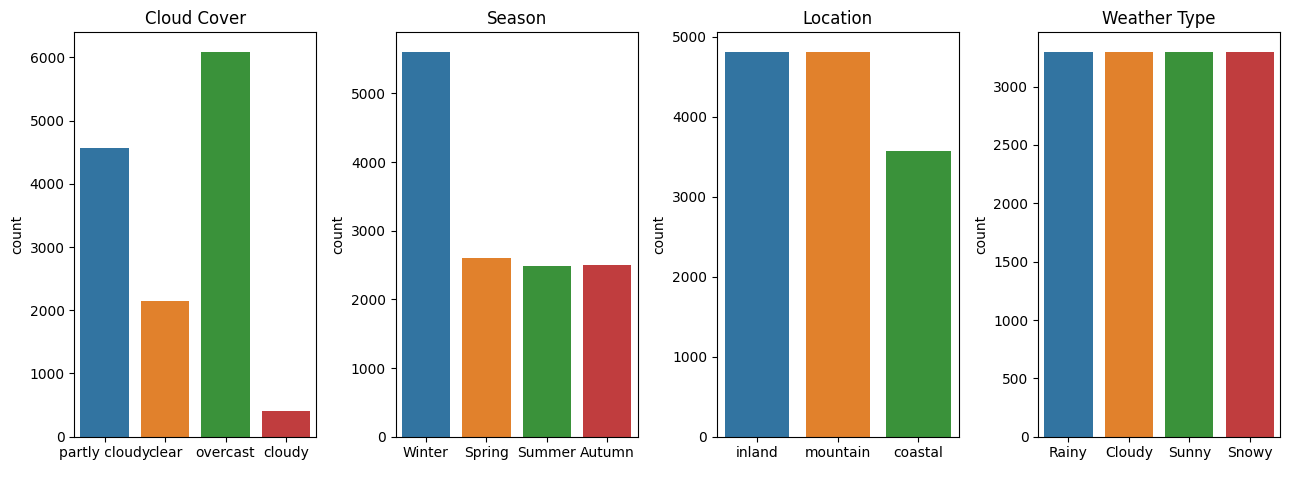

In [9]:
fig, ax = plt.subplots(nrows = len(data_weather.select_dtypes(exclude='number').columns)//4, ncols = 4, figsize = (13, 5))
ax = ax.flatten()
for i,col in enumerate(data_weather.select_dtypes(exclude='number').columns):
  k = sns.countplot(data = data_weather, x  = col, hue = col, ax=ax[i], legend= False)
  ax[i].set_title(col)
  ax[i].set_xlabel(" ")

plt.tight_layout()
plt.show()

This code is designed to visualize the distribution of categorical variables in your dataset (`data_weather`). Here's a breakdown:

1. **Identifying Categorical Columns:**
   - `categorical_columns = data_weather.select_dtypes(exclude='number').columns` extracts column names that do not contain numerical data.

2. **Calculating Plot Layout:**
   - `n_rows` determines the number of rows needed to display all categorical columns in a grid (4 columns per row).

3. **Creating Subplots:**
   - `fig = make_subplots(...)` creates a figure with the calculated rows and columns, giving each subplot a title from the `categorical_columns` list.

4. **Generating Bar Charts:**
   - The `for` loop iterates through each categorical column:
      - Calculates its position in the grid (`row`, `col_pos`).
      - Counts the occurrences of each unique value in the column (`counts`).
      - Adds a bar chart of the counts to the appropriate subplot (`fig.add_trace(...)`).

5. **Adjusting Layout and Display:**
   - `fig.update_layout(...)` sets the height and width of the figure, ensuring all bar charts are visible.
   - `fig.show()` displays the figure, presenting a grid of bar charts visualizing the distribution of each categorical variable.

**Purpose:** This code provides a quick and effective way to understand the frequencies of different categories within your categorical variables. This is crucial for identifying common or rare values, detecting potential imbalances, and gaining insights into the overall distribution of categorical data.


In [10]:
categorical_columns = data_weather.select_dtypes(exclude='number').columns
n_rows = len(categorical_columns) // 4 + (len(categorical_columns) % 4 > 0)

fig = make_subplots(rows=n_rows, cols=4, subplot_titles=categorical_columns)

for i, col in enumerate(categorical_columns):
    row = i // 4 + 1
    col_pos = i % 4 + 1
    counts = data_weather[col].value_counts()
    fig.add_trace(go.Bar(x=counts.index, y=counts.values, name=col), row=row, col=col_pos)

fig.update_layout(height=n_rows*500, width=1500, title_text="Count Plots of Categorical Columns")
fig.show()

### 2. Chi-Squared Tests with Bar Charts:

This code aims to assess the relationship between your target variable (`target`) and each categorical column in your dataset (`data_weather`) using chi-squared tests. Here's a breakdown:

1. **Setting Up Plots:**
   - `fig, ax = plt.subplots(...)` creates a figure with 1 row and 4 columns, each column representing a subplot.
   - `ax = ax.flatten()` flattens the array of subplots for easier iteration.
   - `cat_selected` is initialized to store categorical columns that show a potential association with the target.

2. **Iterating Through Categorical Columns:**
   - The `for` loop iterates through each categorical column (`col`):
      - Creates a cross-tabulation (`k`) between the target and the categorical column to see the frequency distribution of each category within the target classes.
      - Plots a bar chart of this cross-tabulation in the corresponding subplot (`k.plot.bar(ax=ax[i])`).
      - Performs a chi-squared test (`stats.chi2_contingency(k)`) to determine if there's a statistically significant association between the target and the categorical column.
      - If the p-value is below 0.2 (suggesting a possible association) and the column is not the target itself, the column is added to `cat_selected`.

3. **Adding Text and Formatting:**
   - The chi-squared statistic and p-value are added as a title to each subplot (`ax[i].set_title(...)`).
   - X-axis labels are rotated for better readability (`ax[i].tick_params(...)`).
   - X-axis labels and subplot y-axis labels are set (`ax[i].set_xlabel(...)`, `ax[i].set_ylabel(...)`).

4. **Displaying the Plots:**
   - `plt.tight_layout()` adjusts subplot parameters for a better visual layout.
   - `plt.show()` displays the figure, presenting bar charts with chi-squared test results for each categorical column.

**Purpose:** This code helps you quickly identify which categorical variables might be relevant to your target variable. The chi-squared test assesses whether the observed distribution of categories within the target variable differs significantly from what would be expected by chance. This is valuable for feature selection and understanding potential relationships in your data.

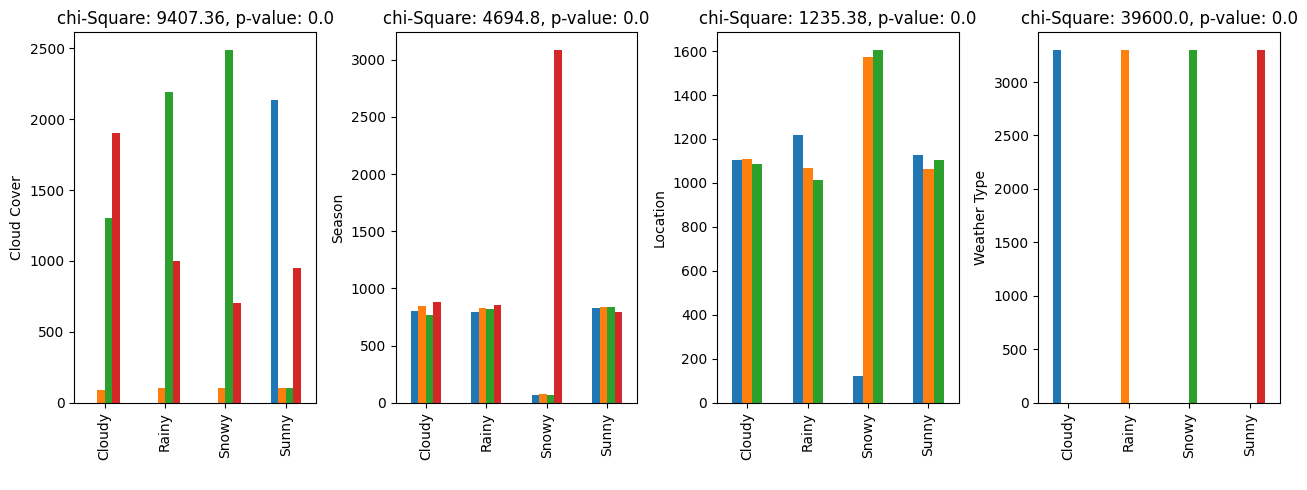

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(13, 5))
ax = ax.flatten()
cat_selected = []
for i,col in enumerate(categorical_columns):
  k = pd.crosstab(data_weather[target], data_weather[col])
  k.plot.bar(ax = ax[i], legend = False)

  stat, p, dof, expected = stats.chi2_contingency(k)
  text_str = f"chi-Square: {round(stat,2)}, p-value: {round(p,2)}"

  if p<0.2 and col != target:
    cat_selected.append(col)

  ax[i].set_title(text_str)
  ax[i].tick_params(axis='x', rotation=90)
  ax[i].set_xlabel(" ")
  ax[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### 3. Grouped Bar Charts with Chi-Squared Tests:

This code visualizes the relationship between your target variable (`target`) and each categorical column in your dataset (`df`) using grouped bar charts and chi-squared tests. Let's break down what it does:

1. **Setting up Figure:**
   - It calculates the number of rows and columns needed for the subplots based on the number of categorical columns.
   - It creates a figure with subplots using `make_subplots` and assigns titles for each subplot based on the column names.
   - An empty list `cat_selected` is initialized to store categorical columns that show a potential association with the target.

2. **Iterating through Columns:**
   - For each categorical column:
     - It creates a cross-tabulation (`k`) between the target and the column to see how each category is distributed within the target classes.
     - It adds a grouped bar chart to the subplot for that column, with each bar representing a target category and the bar's height showing the frequency of the corresponding category in that target class.
     - It performs a chi-squared test (`stats.chi2_contingency(k)`) to determine if there's a statistically significant association between the target and the categorical column.
     - If the p-value is below 0.2 (suggesting a possible association) and the column isn't the target, it's added to `cat_selected`.
     - It adds an annotation to the subplot displaying the chi-squared statistic and p-value.
     - It updates the subplot's axis labels for clarity.

3. **Displaying the Figure:**
   - It adjusts the overall layout of the figure for better readability and sets the title.
   - It finally displays the figure, presenting grouped bar charts with chi-squared test results for each categorical column.

**Key Improvements from Previous Code:**

- **Grouped Bar Charts:** This code uses grouped bar charts to visualize the distribution of categories within each target class, making it easier to see how they differ.
- **Annotations:** Chi-squared test results are directly shown as annotations on the subplots, eliminating the need to look at separate titles.
- **Layout:** The figure layout is more structured and easier to read due to consistent subplot styling and annotations.

**Purpose:** This improved code provides a more informative visualization of the relationship between categorical columns and the target variable. It helps identify potential associations between variables, aiding in feature selection and understanding the underlying patterns in your data.


In [12]:
n_cols = 4
n_rows = len(categorical_columns) // n_cols + (len(categorical_columns) % n_cols > 0)

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[f"{col}" for col in categorical_columns])

cat_selected = []

for i, col in enumerate(categorical_columns):
    row = i // n_cols + 1
    col_pos = i % n_cols + 1
    k = pd.crosstab(data_weather[target], data_weather[col])

    for j, (name, values) in enumerate(k.items()):
        fig.add_trace(go.Bar(x=k.index, y=values, name=name, legendgroup=name, showlegend=(i==0)), row=row, col=col_pos)

    stat, p, dof, expected = stats.chi2_contingency(k)
    text_str = f"chi-Square: {round(stat,2)}, p-value: {round(p,2)}"

    if p < 0.2 and col != target:
        cat_selected.append(col)

    fig.add_annotation(
        x=0.5,
        y=1.1,
        xref=f"x{i+1}",
        yref=f"y{i+1}",
        text=text_str,
        showarrow=False,
        font=dict(size=10),
        align="center",
        xanchor="center",
        yanchor="top"
    )
    fig.update_xaxes(title_text=col, tickangle=90, row=row, col=col_pos)
    fig.update_yaxes(title_text="Count", row=row, col=col_pos)

fig.update_layout(height=n_rows*500, width=1500, title_text="Bar Plots with Chi-Square Statistics")
fig.show()

* **The chi-square test and the corresponding p-value of 0.0 tell us that the weather type is significantly influenced by cloud cover, season, and location, and these relationships are not due to random chance.**

In [13]:
print(cat_selected)

['Cloud Cover', 'Season', 'Location']


**Functionality:**

- It selects all columns from the DataFrame `data_weather` that have numerical data types.
- It stores the names of these numerical columns in the variable `numerical_cols`.

**In Detail:**

1. **`data_weather.select_dtypes(include='number')`:**
   - This part uses the `select_dtypes` method of Pandas DataFrames.
   - The `include='number'` argument tells Pandas to filter only columns with numerical data types (e.g., int64, float64).

2. **`.columns`:**
   - This attribute extracts the names of the selected columns as a list-like object (a Pandas Index).

3. **`numerical_cols = ...`:**
   - This assigns the resulting list of column names to the variable `numerical_cols`.



### 4. Selecting Numerical Columns:

In [14]:
numerical_cols=data_weather.select_dtypes(include='number').columns

**Purpose:**

This code creates a grid of kernel density estimation (KDE) plots to visualize the distribution of each numerical column in your `data_weather` DataFrame. It also calculates and displays the skewness and kurtosis for each distribution.

**Explanation:**

1. **Setting up Subplots:**
   - `fig, ax = plt.subplots(...)` creates a figure with 3 rows and 3 columns of subplots, ideal for displaying 9 numerical columns.
   - `ax = ax.flatten()` flattens the 2D array of axes objects into a 1D array, making it easier to iterate through them.

2. **Looping Through Numerical Columns:**
   - The `for` loop iterates through each numerical column in `numerical_cols`.
     - `sns.kdeplot(...)` creates a KDE plot for the current column on the corresponding subplot.
     - `stats.skew(...)` and `stats.kurtosis(...)` calculate the skewness and kurtosis, respectively, of the column's data.
     - The results are formatted into a string (`text`) and added as the title of the subplot.

3. **Displaying the Plots:**
   - `plt.tight_layout()` adjusts the subplot parameters to prevent overlapping elements and improve readability.
   - `plt.show()` displays the final figure with all the KDE plots and statistical information.

**Insights:**

- **KDE Plots:** These plots help you visualize the shape of the distribution for each numerical variable, revealing things like modality (number of peaks), symmetry, and potential outliers.
- **Skewness:** Indicates the asymmetry of the distribution. Positive skew means the tail is on the right, negative skew means the tail is on the left, and zero skew means the distribution is symmetric.
- **Kurtosis:** Measures the "tailedness" of the distribution. Higher kurtosis indicates heavier tails (more outliers), while lower kurtosis indicates lighter tails (fewer outliers).


### 5. KDE Plots with Skewness and Kurtosis:

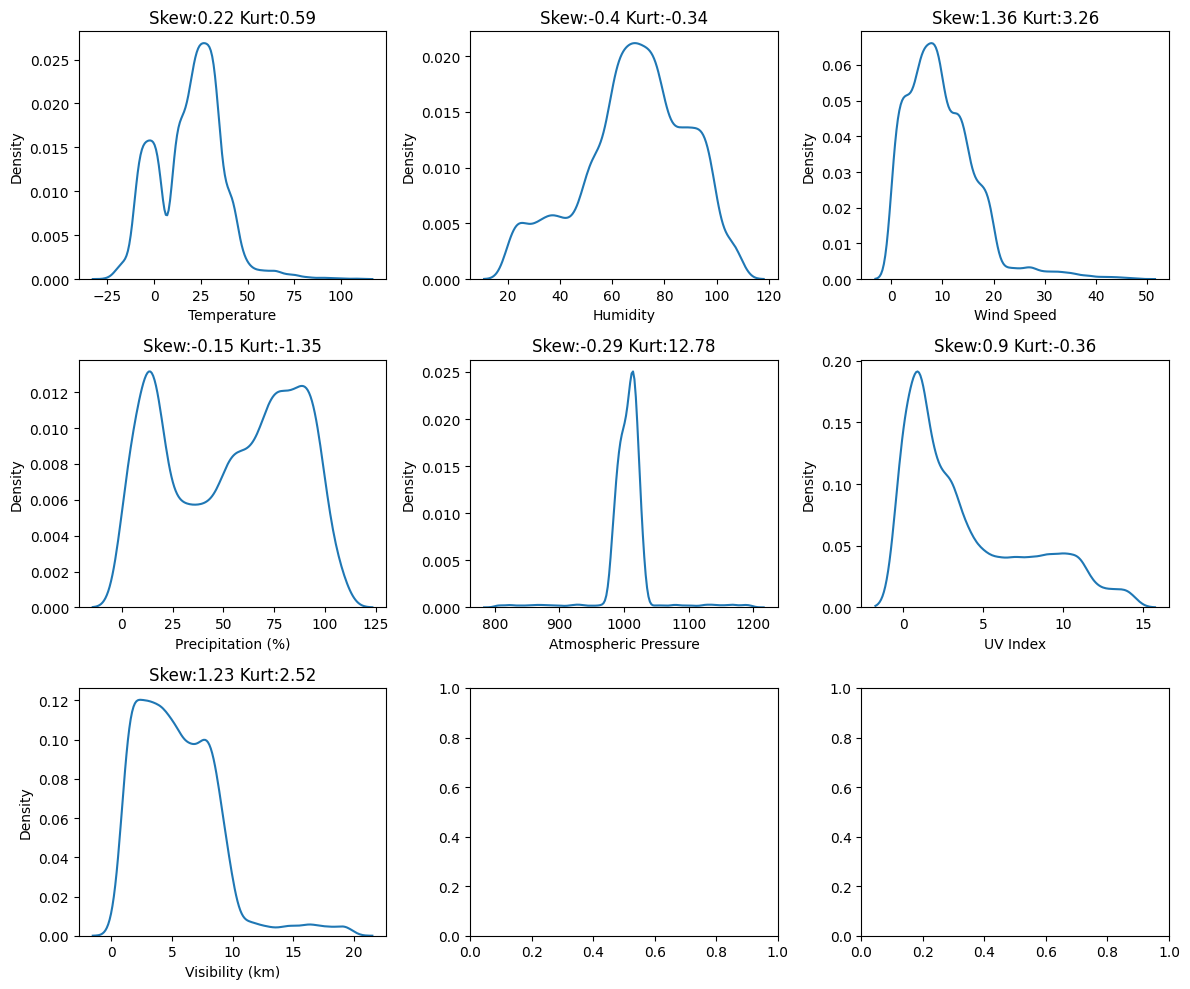

In [15]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()
for i,col in enumerate(numerical_cols):
    k=sns.kdeplot(data=data_weather,x=col,ax=ax[i])
    skewness=round(stats.skew(data_weather[col],bias=False),2)
    kurt=round(stats.kurtosis(data_weather[col],bias=False),2)
    text=f"Skew:{skewness} Kurt:{kurt}"
    ax[i].set_title(text)

plt.tight_layout()
plt.show()



**Purpose:**

This code creates a heatmap to visualize the correlations between numerical columns in your `data_weather` DataFrame.

**Explanation:**

1. **`data_weather.corr(numeric_only=True)`:**
   - This part calculates the correlation matrix for the numerical columns in your DataFrame.
   - The `numeric_only=True` argument ensures that only numerical columns are considered for correlation calculation.

2. **`sns.heatmap(...)`:**
   - This is the Seaborn function that creates the heatmap visualization. Let's look at the arguments:
      - **`data`:** The correlation matrix calculated in step 1.
      - **`annot=True`:** This adds numerical annotations to each cell in the heatmap, showing the exact correlation values.
      - **`cmap='coolwarm'`:** This sets the color palette for the heatmap. 'coolwarm' is a diverging colormap where negative correlations are represented by cool colors (blue) and positive correlations by warm colors (red).

**Output:**

The code will generate a heatmap where:

- The rows and columns represent the numerical variables in your dataset.
- The color intensity of each cell indicates the strength of the correlation between the corresponding pair of variables.
- The annotations show the exact correlation coefficient (ranging from -1 to 1) for each pair.

**Interpretation:**

- **Strong positive correlation:** Values close to 1 indicate that the two variables tend to increase or decrease together.
- **Strong negative correlation:** Values close to -1 indicate that one variable tends to increase as the other decreases.
- **Weak correlation:** Values close to 0 indicate little to no linear relationship between the variables.

**Benefits of using this code:**

- **Visualizing relationships:** Quickly identify which numerical variables are strongly related to each other.
- **Feature selection:** The heatmap can help you select relevant features for your machine learning models.
- **Identifying multicollinearity:** Spot highly correlated variables, which might be problematic in some models.

### 6. Correlation Heatmap:

<Axes: >

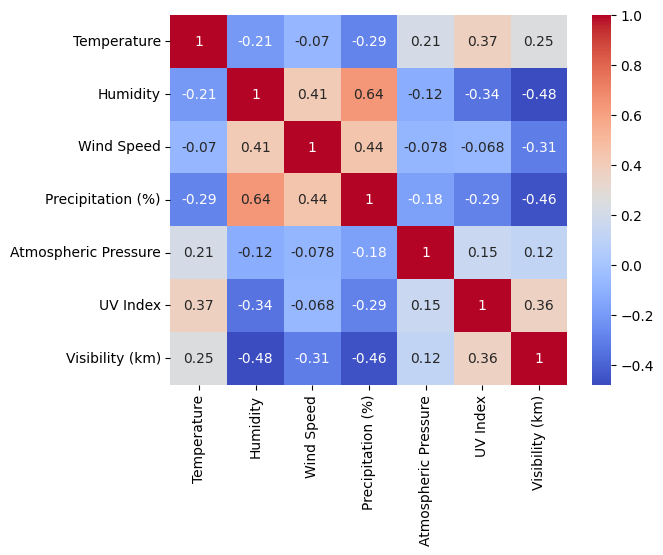

In [16]:
sns.heatmap(data_weather.corr(numeric_only=True),annot=True,cmap='coolwarm')

### 7. ANOVA Tests with KDE Plots:


**Purpose:**

This code aims to assess the relationship between your target variable (`target`) and each numerical column in your dataset (`data_weather`) using one-way ANOVA tests. It visualizes the distributions of numerical columns for each target group and indicates whether there are statistically significant differences between them.

**Explanation:**

1. **Setting up Subplots:**
   - `fig, ax = plt.subplots(...)` creates a figure with 3 rows and 3 columns of subplots.
   - `ax = ax.flatten()` flattens the array of subplot objects for easier iteration.
   - `i = 0` initializes a counter to track the subplot index.
   - `num_selected = []` creates a list to store numerical columns that show a potential association with the target.

2. **Looping Through Numerical Columns:**
   - The `for` loop iterates through each numerical column:
     - `k = dict(list(data_weather.groupby(target)[col]))` groups the numerical column's values based on the `target` categories, creating a dictionary where keys are target values and values are lists of corresponding numerical values.
     - `f, p = stats.f_oneway(*k.values())` performs a one-way ANOVA test on the groups to determine if their means are statistically significantly different.
     - `text_str` formats the ANOVA F-statistic and p-value into a string.
     - If the p-value is below 0.2 (suggesting a possible association), the column is added to `num_selected`.
     - `sns.kdeplot(...)` creates a KDE plot for the column, with separate distributions for each target category (using `hue=target`).
     - The ANOVA results are added as the title of the subplot.
     - Axis labels are rotated and the subplot counter is incremented.

3. **Displaying the Plots:**
   - `plt.tight_layout()` adjusts the layout to prevent overlapping elements.
   - `plt.show()` displays the figure with the KDE plots and ANOVA test results for each numerical column.

**Key Improvements from Previous Code:**

- **ANOVA Test:** Instead of a simple correlation matrix, this code uses ANOVA to directly assess if the means of numerical variables differ significantly across target categories.
- **KDE Plots with Hue:** The KDE plots now show separate distributions for each target group, making it easier to visually compare them.

**Purpose:**
This code helps you identify which numerical variables are likely to be informative for predicting or understanding your target variable. The ANOVA test and visual comparison of distributions provide evidence of whether a variable's values are associated with different target outcomes.


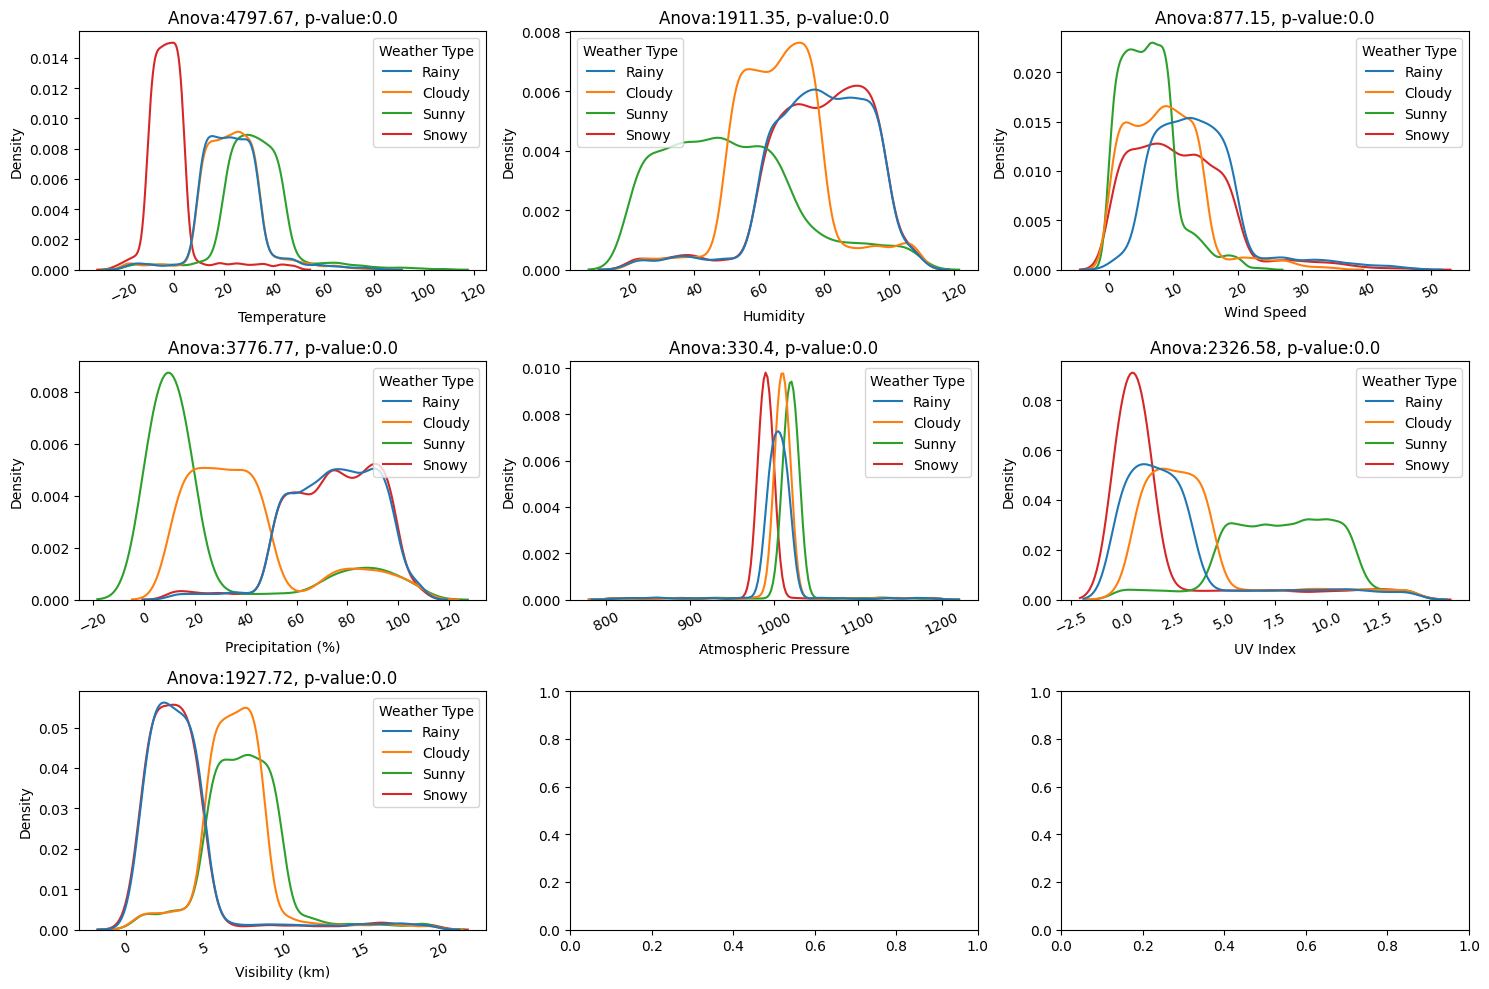

In [17]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
ax = ax.flatten()
i=0
num_selected=[]
for col in numerical_cols:
    k=dict(list(data_weather.groupby(target)[col]))
    f,p=stats.f_oneway(*k.values())
    text_str=f"Anova:{round(f,2)}, p-value:{round(p,2)}"

    if p<0.2 and col not in num_selected:
            num_selected.append(col)

    sns.kdeplot(data=data_weather,x=col,hue=target,ax=ax[i])
    ax[i].set_title(text_str)
    ax[i].tick_params(axis='x', rotation=25)
    i+=1

plt.tight_layout()
plt.show()

* **The ANOVA results and p-values tell us that the weather type plays a significant role in determining the various weather parameters analyzed. This information can be valuable for weather forecasting, climate modeling, and understanding the impact of weather on various activities.**

In [18]:
print(num_selected)

['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


**Purpose:**

This line of code imports the `LabelEncoder` class from the `sklearn.preprocessing` module in the scikit-learn library.

**Functionality:**

- **Label Encoding:** `LabelEncoder` is a tool used to transform categorical data (e.g., text labels like "red," "green," "blue") into numerical representations (e.g., 0, 1, 2).
- **Why Label Encoding?** Many machine learning algorithms require numerical input, so label encoding is a way to make categorical data usable for these algorithms.
- **How it Works:**  
    - The `LabelEncoder` fits to your categorical data by assigning a unique integer to each category.
    - It then transforms the original data by replacing each category with its corresponding integer label.


## Weather Prediction Model Takes Flight: Training Commences to Unlock Meteorological Mysteries

### Label Encoding:

In [19]:
from sklearn.preprocessing import LabelEncoder

**Purpose:**

This code prepares your data for machine learning by label encoding categorical features (`cat_selected`) and the target variable (`target`), while leaving the numerical features (`num_selected`) as is.

**Explanation:**

1. **Selecting Features and Target:**
   - `data = data_weather[cat_selected + num_selected]` creates a new DataFrame (`data`) that includes only the columns listed in `cat_selected` (categorical) and `num_selected` (numerical). This assumes you have already determined these lists in previous code.

2. **Label Encoding Categorical Features:**
   - `le = LabelEncoder()` initializes a LabelEncoder object.
   - `data = data.apply(le.fit_transform)` applies label encoding to each column in `data`. The `apply` method iterates over each column, and if it's a categorical column (identified based on its data type), it fits the `LabelEncoder` to the unique categories and then transforms the column into numerical labels.

3. **Label Encoding Target Variable:**
   - `data_weather[target] = le.fit_transform(data_weather[target])` label encodes the `target` variable separately within the original `data_weather` DataFrame.  This is typically done because the target variable plays a special role in machine learning and should be handled independently.

**Key Points:**

- **Feature Engineering:** This code is a crucial step in feature engineering, transforming categorical data into a format suitable for many machine learning algorithms.
- **Target Encoding:** Encoding the target variable is often required when it's categorical. This is essential for classification tasks where the algorithm needs numerical targets for training.
- **Avoiding Data Leakage:** The `LabelEncoder` is fitted and transformed separately for each column to prevent information leakage between features.
- **Preserving Original Data:** The original `data_weather` DataFrame is modified in place by replacing the `target` column with its encoded version.

**Potential Improvements:**

- **Handling Missing Values:** You might need to handle missing values before label encoding.
- **Ordinal Encoding:** If your categorical features have an inherent order, consider using Ordinal Encoding instead of Label Encoding.
- **One-Hot Encoding:** For nominal categorical features (no inherent order), One-Hot Encoding might be a better choice to avoid introducing artificial ordinality.

In [25]:
data = data_weather[cat_selected+num_selected]

le = LabelEncoder()
data = data.apply(le.fit_transform)


data_weather[target] = le.fit_transform(data_weather[target])

**Purpose:**

These lines prepare your data for machine learning by creating input features (`X`) and target values (`Y`).

**Explanation:**

1. **`X = data.values`:**
   - **`data.values`:** This extracts the underlying NumPy array from the Pandas DataFrame `data`. It gives you a two-dimensional array where each row represents a sample (data point) and each column represents a feature (either a label-encoded categorical feature or a numerical feature).
   - **`X = ...`:**  The resulting NumPy array is assigned to the variable `X`, which is commonly used to represent input features in machine learning.

2. **`Y = data_weather[target].values`:**
   - **`data_weather[target]`:** This selects the column corresponding to your target variable from the `data_weather` DataFrame.  Remember that `target` is assumed to be a single column name.
   - **`.values`:** Similar to the previous line, this extracts the underlying NumPy array from the target column, giving you a one-dimensional array of target values.
   - **`Y = ...`:** The resulting array is assigned to the variable `Y`, the standard notation for target values in machine learning.

**Key Points:**

- **NumPy Arrays:** Many machine learning libraries in Python (like scikit-learn) expect input data in the form of NumPy arrays, not Pandas DataFrames. This conversion makes your data compatible.
- **Feature-Target Separation:** The code explicitly separates features (`X`) and target values (`Y`), a crucial step for training and evaluating machine learning models.
- **Assumption:** It assumes that the `target` variable has already been label encoded into numerical format in the previous steps.

### Creating X and Y:

In [21]:
X = data.values
Y = data_weather[target].values

**Purpose:**

This code splits your dataset (`X` and `Y`) into two sets: a training set and a testing set. This is a fundamental step in machine learning to evaluate how well your model generalizes to unseen data.

**Explanation:**

1. **Import `train_test_split`:**
   - `from sklearn.model_selection import train_test_split` imports the necessary function for splitting the data.

2. **Splitting the Data:**
   - `X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)`
     - **`X`:** Your feature matrix (2D NumPy array) containing the input features for your model.
     - **`Y`:** Your target vector (1D NumPy array) containing the corresponding labels or values you want to predict.
     - **`test_size=0.2`:** Specifies that 20% of your data will be allocated to the test set, while the remaining 80% will be used for training.
     - **`random_state=42`:** This ensures reproducibility. Setting a seed value for the random number generator guarantees that the same split will be produced each time you run the code.

**Output:**

The function returns four objects:

- **`X_train`:** The feature matrix for the training set.
- **`X_test`:** The feature matrix for the testing set.
- **`y_train`:** The target vector for the training set.
- **`y_test`:** The target vector for the testing set.

**How it Works:**

- The function first shuffles your dataset randomly.
- It then splits the shuffled data into the specified proportions (80% for training and 20% for testing in this case).
- The `random_state` ensures that the shuffling and splitting process is the same every time you run the code with the same seed value.

**Why Split Data:**

- **Model Evaluation:** The test set is used to evaluate your trained model's performance on data it hasn't seen before. This helps prevent overfitting (where your model memorizes the training data and performs poorly on new data).
- **Generalization:**  By testing on unseen data, you get a better estimate of how well your model will generalize to real-world scenarios.


### Train-Test Split:

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


**Purpose:**

This code trains and evaluates multiple classification models on your dataset and then displays their performance metrics in an organized format. It is a comprehensive comparison tool for choosing the best model for your task.

**Explanation:**

1. **Import Necessary Libraries:**
   - It imports various machine learning models (Logistic Regression, Decision Tree, Random Forest, SVM, KNN) and evaluation metrics from `sklearn`.

2. **Initialize and Train Models:**
   - `models` dictionary is created to store model instances.
   - A loop iterates through each model in the dictionary, fitting it to the training data (`X_train`, `y_train`).

3. **Create Results Dictionary:**
   - An empty dictionary `results` is created to store the evaluation metrics for each model.

4. **Evaluate Models and Store Metrics:**
   - A loop iterates through each model again.
   - For each model, it predicts on the test set (`X_test`) and calculates various metrics (accuracy, precision, recall, F1-score).
   - It also generates a confusion matrix and a classification report.
   - The results (metrics, confusion matrix, and classification report) are stored in the `results` dictionary, with the model names as keys.

5. **Display Results:**
   - Another loop iterates through the `results` dictionary.
   - For each model, it prints the model name and its metrics in a well-formatted markdown style.
     - The confusion matrix is displayed as a pandas DataFrame.
     - The classification report is printed directly.

**Key Improvements and Considerations:**

- **Multiple Models:** The code compares multiple models, which is essential for finding the best one for your task.
- **Comprehensive Evaluation:** It uses a variety of metrics (accuracy, precision, recall, F1-score) and provides confusion matrices and classification reports for a detailed understanding of model performance.
- **Weighted Metrics:** The `average='weighted'` parameter in the precision, recall, and F1-score calculations accounts for class imbalance by weighting the metrics based on the number of samples in each class.
- **Original Labels in Reports:** The code uses `le.classes_` to ensure that the original labels are used in the confusion matrix and classification report, making them easier to interpret.
- **Hyperparameter Tuning:** You might want to consider hyperparameter tuning for each model to potentially improve performance.

### Model Training and Evaluation:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Create a dictionary to store the evaluation metrics
results = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store metrics in the dictionary
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, target_names=le.classes_)  # Use original labels
    }

# Display results in markdown format
for name, metrics in results.items():
    print(f"## {name}\n")
    print(f"**Accuracy:** {metrics['Accuracy']:.4f}\n")
    print(f"**Precision:** {metrics['Precision']:.4f}\n")
    print(f"**Recall:** {metrics['Recall']:.4f}\n")
    print(f"**F1-Score:** {metrics['F1-Score']:.4f}\n")
    print("**Confusion Matrix:**\n")
    print(pd.DataFrame(metrics['Confusion Matrix'], index=le.classes_, columns=le.classes_).to_markdown(numalign="left", stralign="left"))  # Use original labels
    print("\n**Classification Report:**\n")
    print(metrics['Classification Report'])
    print("\n---\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Logistic Regression

**Accuracy:** 0.8561

**Precision:** 0.8555

**Recall:** 0.8561

**F1-Score:** 0.8557

**Confusion Matrix:**

|        | Cloudy   | Rainy   | Snowy   | Sunny   |
|:-------|:---------|:--------|:--------|:--------|
| Cloudy | 533      | 58      | 14      | 46      |
| Rainy  | 42       | 535     | 38      | 32      |
| Snowy  | 19       | 3       | 657     | 22      |
| Sunny  | 53       | 42      | 11      | 535     |

**Classification Report:**

              precision    recall  f1-score   support

      Cloudy       0.82      0.82      0.82       651
       Rainy       0.84      0.83      0.83       647
       Snowy       0.91      0.94      0.92       701
       Sunny       0.84      0.83      0.84       641

    accuracy                           0.86      2640
   macro avg       0.85      0.85      0.85      2640
weighted avg       0.86      0.86      0.86      2640


---

## Decision Tree

**Accuracy:** 0.9068

**Precision:** 0.9069

**Recall:** 0.9068

*

## Conclusion :

Based on the provided metrics, the Random Forest model is the best performing model. Here's a detailed comparison and rationale for choosing Random Forest:

### Accuracy
- **Random Forest:** 0.9125
- Decision Tree: 0.9068
- Logistic Regression: 0.8561
- KNN: 0.8485
- SVM: 0.6307

### Precision
- **Random Forest:** 0.9131
- Decision Tree: 0.9069
- Logistic Regression: 0.8555
- KNN: 0.8490
- SVM: 0.6315

### Recall
- **Random Forest:** 0.9125
- Decision Tree: 0.9068
- Logistic Regression: 0.8561
- KNN: 0.8485
- SVM: 0.6307

### F1-Score
- **Random Forest:** 0.9126
- Decision Tree: 0.9068
- Logistic Regression: 0.8557
- KNN: 0.8483
- SVM: 0.6061

### Confusion Matrix and Classification Report
- **Random Forest:** Shows high precision and recall for all classes, indicating good performance across all weather categories.
- Decision Tree: Also performs well but slightly lower than Random Forest.
- Logistic Regression and KNN: Good performance but not as high as Random Forest.
- SVM: Significantly lower performance compared to other models.

### Rationale for Choosing Random Forest
- **Consistent High Performance:** The Random Forest model consistently outperforms the other models across all key metrics—accuracy, precision, recall, and F1-score.
- **Balanced Performance Across Classes:** The confusion matrix and classification report indicate that Random Forest performs well across all weather categories, with minimal misclassifications.
- **Robustness:** Random Forest tends to be more robust to overfitting compared to Decision Trees, as it aggregates the predictions of multiple trees, providing better generalization to unseen data.

Given these points, the Random Forest model is the most reliable and effective choice for this classification task.